### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data with pandas dataframe

In [2]:
df = pd.read_csv('/Users/cerenmorey/Desktop/Final Data Analysis Project/immolisa_scrapped_data.csv',skipinitialspace=True)
df.head() #Check the top 5 rows

,Bedroom,Property Type,Property Subtype,Price,Location,Province,Living area,Kitchen Type,Furnished,HasFireplace,How many fireplaces?,HasGarden,Garden surface,HasTerrace,Terrace surface,Surface of the plot,Number of frontages,Swimming pool,Building condition
0,1,Apartment,Apartment,"375,000",1160,Brussels,76,USA hyper equipped,No,No,0,No,0,Yes,25,0,0,No,As new
1,2,Apartment,Apartment,"249,000",9700,Oost-vlaanderen,97,Installed,No,No,0,No,0,No,0,0,4,No,Good
2,2,Apartment,Apartment,"275,000",1080,Brussels,98,Hyper equipped,No,No,0,No,0,Yes,4,0,2,No,As new
3,3,House,Town-house,"435,000",1785,Vlaams-brabant,213,Hyper equipped,No,No,0,Yes,138,Yes,7,249,2,No,Just renovated
4,5,House,House,"750,000",1150,Brussels,260,Installed,No,No,0,No,0,No,0,110,2,No,Good


In [3]:
#Check general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9256 entries, 0 to 9255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bedroom               9256 non-null   int64 
 1   Property Type         9256 non-null   object
 2   Property Subtype      9256 non-null   object
 3   Price                 9256 non-null   object
 4   Location              9256 non-null   int64 
 5   Province              9256 non-null   object
 6   Living area           9256 non-null   int64 
 7   Kitchen Type          9256 non-null   object
 8   Furnished             9256 non-null   object
 9   HasFireplace          9256 non-null   object
 10  How many fireplaces?  9256 non-null   int64 
 11  HasGarden             9256 non-null   object
 12  Garden surface        9256 non-null   int64 
 13  HasTerrace            9256 non-null   object
 14  Terrace surface       9256 non-null   int64 
 15  Surface of the plot   9256 non-null   

## Data Cleaning

In [11]:
#Remove duplicate listing

df.drop_duplicates(['Location','Property Type','Property Subtype','Price','Bedroom','Living area'], keep='first', inplace=True, ignore_index=True)


In [12]:


df[df.duplicated()] #Check again if all duplicates are removed

,Bedroom,Property Type,Property Subtype,Price,Location,Province,Living area,Kitchen Type,Furnished,HasFireplace,How many fireplaces?,HasGarden,Garden surface,HasTerrace,Terrace surface,Surface of the plot,Number of frontages,Swimming pool,Building condition


### *Checking each column for any potential reasons to clean*

In [13]:
#Check bedroom column
df['Bedroom'].unique()

array([ 1,  2,  3,  5,  6,  4,  0,  8,  7,  9, 22, 10, 41, 13, 12, 11, 16,
       20, 18, 15])

In [14]:
df[df['Bedroom'] == 41] 
#Check which listing has 41 bedrooms, its unusual.

,Bedroom,Property Type,Property Subtype,Price,Location,Province,Living area,Kitchen Type,Furnished,HasFireplace,How many fireplaces?,HasGarden,Garden surface,HasTerrace,Terrace surface,Surface of the plot,Number of frontages,Swimming pool,Building condition
696,41,House,Mixed-use building,"5,200,000",1000,Brussels,2049,USA hyper equipped,No,No,0,Yes,198,Yes,70,1988,4,No,As new
697,41,House,Mixed-use building,"5,200,000",1070,Brussels,2049,USA hyper equipped,No,No,0,Yes,198,Yes,70,1988,4,No,As new


#### *Mixed-use building listings sums all individual properties that they sell and give a sum result for each column; bedroom, price, living ares..*

In [15]:
#Check Property Type
df['Property Type'].unique()
#Looks fine

array(['Apartment', 'House'], dtype=object)

In [16]:
#Check Property Subtype
df['Property Subtype'].unique()
#Looks fine

array(['Apartment', 'Town-house', 'House', 'Apartment block', 'Villa',
       'Penthouse', 'Mansion', 'Studio', 'Exceptional property',
       'Mixed-use building', 'Kot', 'Duplex', 'Triplex', 'Ground floor',
       'Bungalow', 'Loft', 'Chalet', 'Service flat', 'Castle',
       'Farmhouse', 'Country house', 'Manor house', 'Other properties'],
      dtype=object)

In [17]:
#Check Price column, from the .info() func we know that its an object type, it needs conversion to be able to do analysis.
df['Price'].dtype

dtype('O')

In [18]:
#First removing the dot(.)
df['Price'] = df['Price'].str.replace('.', '')

In [19]:
#Some rows have commas(,) so they need to be removed too
df['Price'] = df['Price'].str.replace(',', '')

In [26]:
# #Convert the data type into a float
df['Price'] = df['Price'].astype(float)
# #Conversion is not working because I have string rows: 'Make' and 'Reserve' and'No'.

In [21]:
df[(df['Price'] == 'Make') | (df['Price'] == 'Reserve')] #Check the rows where the Price is 'Make' and 'Reserve'

,Bedroom,Property Type,Property Subtype,Price,Location,Province,Living area,Kitchen Type,Furnished,HasFireplace,How many fireplaces?,HasGarden,Garden surface,HasTerrace,Terrace surface,Surface of the plot,Number of frontages,Swimming pool,Building condition
12,2,Apartment,Apartment,Make,1190,Brussels,103,Semi equipped,No,No,0,No,0,Yes,25,0,2,No,Good
35,2,Apartment,Penthouse,Make,1160,Brussels,75,Installed,No,No,0,No,0,Yes,35,0,0,No,To be done up
133,3,Apartment,Duplex,Make,1600,Vlaams-brabant,116,Semi equipped,No,No,0,No,0,Yes,15,0,3,No,Good
139,3,House,Villa,Make,5300,Namen,147,USA semi equipped,No,No,0,Yes,700,Yes,10,852,4,No,To be done up
152,6,House,House,Make,4520,Luik,255,Hyper equipped,No,No,0,Yes,200,Yes,20,365,3,No,As new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,1,Apartment,Apartment,Reserve,2018,Antwerpen,80,Installed,0,No,0,No,0,No,0,0,2,No,Unknown
8795,3,Apartment,Apartment,Make,7000,Henegouwen,140,Semi equipped,0,No,0,No,0,No,0,0,0,No,To renovate
8805,1,Apartment,Ground floor,Make,7022,Henegouwen,60,Installed,Yes,No,0,Yes,59,Yes,22,0,3,No,As new
8824,2,Apartment,Apartment,Make,8310,West-vlaanderen,89,Hyper equipped,No,No,0,No,0,Yes,10,0,2,No,Good


*The reason of this 'Make' and 'Reserve' rows are because in the website, they are listed as e.g. **'Make Offering'** or **'Reserve for £150.000'**.*

In [22]:
df[df['Price'] == 'No'] #And 1 row with the 'No' value. I found the corresponding value to it from colleagues' csv.

,Bedroom,Property Type,Property Subtype,Price,Location,Province,Living area,Kitchen Type,Furnished,HasFireplace,How many fireplaces?,HasGarden,Garden surface,HasTerrace,Terrace surface,Surface of the plot,Number of frontages,Swimming pool,Building condition
7053,2,Apartment,Apartment,No,1080,Brussels,91,Installed,0,No,0,No,0,No,0,0,0,No,Unknown


In [23]:
df['Price'].replace({'No': 275000}, inplace=True) #Replace the 'No' with the correct value


In [24]:
#For this analysis, I will remove the rows that are not a number since there are only 447 counts.
df= df[(df['Price'] != 'Make') & (df['Price'] != 'Reserve')]

In [25]:
#Now the column can be converted to float type
df['Price'] = df['Price'].astype(float)

<ipython-input-25-4d88e3f3c3a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


In [27]:
df['Price'] = df['Price']/1000 #Making the prices easier to read

<ipython-input-27-d71451846825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price']/1000 #Making the prices easier to read


In [28]:
#Checking the count of missing values in Location column: stated as 0.
(df['Location'] == 0).sum()

1247

**Since this analysis requires finding the expensive and cheaper regions of Belgium, having a missing value on Postal code will not be usefull. Therefore, I will remove them from the dataframe.**

In [29]:
df= df[df['Location'] != 0]

In [30]:
df['Location'].count() #Remaining count

7233

In [31]:
#Checking the Province column
df['Province'].unique() 

#Looks fine, 11 province in total.

array(['Brussels', 'Oost-vlaanderen', 'Vlaams-brabant', 'Luik', 'Namen',
       'Luxemburg', 'West-vlaanderen', 'Antwerpen', 'Henegouwen',
       'Waals-brabant', 'Limburg'], dtype=object)

In [32]:
#Checking the Living are column

print("Max:" ,df['Living area'].max()) #checking anomalities
print("Min:" ,df['Living area'].min())
print("Length of missing values:" , (df['Living area'] == 0).sum())

Max: 4709
Min: 0
Length of missing values: 221


In [25]:
#Remove the Locations where there are less than 10 listings. (10 is the average number of listing per postal code.)

In [33]:
counts = df['Location'].value_counts()

df = df[~df['Location'].isin(counts[counts < 10].index)]




In [34]:
#Remove mixed-use buildings from the analysis because they are not an individual listing.
df = df[df['Property Subtype'] != 'Mixed-use building']

In [35]:
df.info()

#5264 entries will be used to answer the questions.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5264 entries, 0 to 8915
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bedroom               5264 non-null   int64  
 1   Property Type         5264 non-null   object 
 2   Property Subtype      5264 non-null   object 
 3   Price                 5264 non-null   float64
 4   Location              5264 non-null   int64  
 5   Province              5264 non-null   object 
 6   Living area           5264 non-null   int64  
 7   Kitchen Type          5264 non-null   object 
 8   Furnished             5264 non-null   object 
 9   HasFireplace          5264 non-null   object 
 10  How many fireplaces?  5264 non-null   int64  
 11  HasGarden             5264 non-null   object 
 12  Garden surface        5264 non-null   int64  
 13  HasTerrace            5264 non-null   object 
 14  Terrace surface       5264 non-null   int64  
 15  Surface of the plot  

In [36]:
listing_count_by_province = df.groupby('Province')['Location'].count() #check which province has the most listing
listing_count_by_province

Province
Antwerpen           535
Brussels           1377
Henegouwen          107
Limburg              13
Luik                575
Luxemburg           133
Namen                19
Oost-vlaanderen     775
Vlaams-brabant      477
Waals-brabant       179
West-vlaanderen    1074
Name: Location, dtype: int64

In [37]:
df.to_csv('final_output_immo.csv',sep=",")

**Brussels and West-vlaanderen has > 1000 listing.**

### Question 1: What is the most expensive province in Belgium?

In [38]:
#Overall look on the prices per province
df.groupby('Province')['Price'].agg(['min','max','mean','median']).sort_values(by='median', ascending=False)

,min,max,mean,median
Province,,,,
Brussels,99.0,5950.0,808.788733,479.00
Limburg,245.0,895.0,500.923077,475.00
Waals-brabant,65.0,5200.0,767.744832,430.00
Vlaams-brabant,73.0,4950.0,647.472541,385.00
Antwerpen,110.0,3995.0,519.270568,345.00
Oost-vlaanderen,75.0,2750.0,356.847952,307.00
West-vlaanderen,74.0,8500.0,519.001602,299.00
Namen,55.0,1225.0,319.934211,263.25
Luxemburg,85.0,899.0,308.128534,250.00


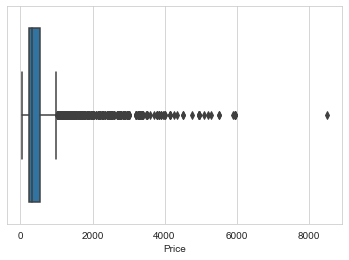

In [39]:
#Check the Price distribution for all regions 

sns.set_style(style="whitegrid")
sns.boxplot(df['Price'])

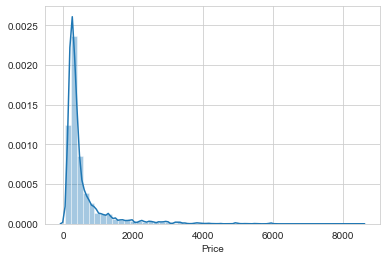

In [40]:
#Distribution plot also provides the same info: Price distribution for all regions
sns.distplot(df['Price'])

In [41]:
#Calculating the average price by province. The result will be plotted later on.

by_mean = df.groupby('Province')['Price'].mean().sort_values(ascending=False).reset_index()
by_mean

,Province,Price
0,Brussels,808.788733
1,Waals-brabant,767.744832
2,Vlaams-brabant,647.472541
3,Antwerpen,519.270568
4,West-vlaanderen,519.001602
5,Limburg,500.923077
6,Oost-vlaanderen,356.847952
7,Namen,319.934211
8,Luxemburg,308.128534
9,Henegouwen,285.913972


In [42]:
#Calculating the median price per province

by_median = df.groupby('Province')['Price'].median().sort_values(ascending=False).reset_index()
by_median

,Province,Price
0,Brussels,479.00
1,Limburg,475.00
2,Waals-brabant,430.00
3,Vlaams-brabant,385.00
4,Antwerpen,345.00
5,Oost-vlaanderen,307.00
6,West-vlaanderen,299.00
7,Namen,263.25
8,Luxemburg,250.00
9,Luik,224.50


In [43]:
#Calculating price per square meter

df['Price per square meter'] = df['Price']/df['Living area']

In [44]:
#Calculating the median price per square meter

by_sqr_m = df.groupby('Province')['Price per square meter'].median().sort_values(ascending=False).reset_index()
by_sqr_m

,Province,Price per square meter
0,Brussels,3.750000
1,Waals-brabant,3.113636
2,Vlaams-brabant,3.024194
3,West-vlaanderen,2.945396
4,Antwerpen,2.763158
5,Limburg,2.393939
6,Oost-vlaanderen,2.302632
7,Luxemburg,2.248750
8,Namen,2.192982
9,Henegouwen,2.078947


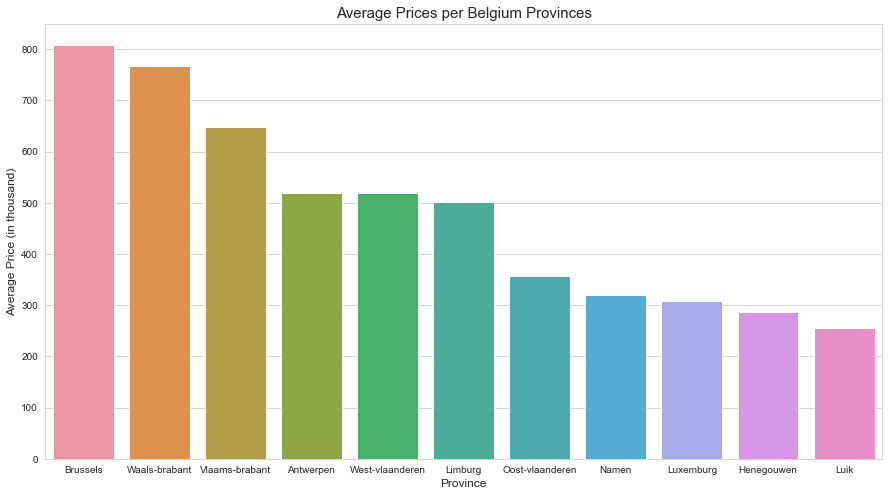

In [45]:
#Plotting the average property price for Belgium provinces

plt.figure(figsize=(15,8))
sns.set_style(style="whitegrid")
ax = sns.barplot(x='Province',y='Price',data=by_mean)
ax.set_xlabel('Province', size=12)
ax.set_ylabel('Average Price (in thousand)', size=12)
ax.set_title('Average Prices per Belgium Provinces', size=15)

plt.show()

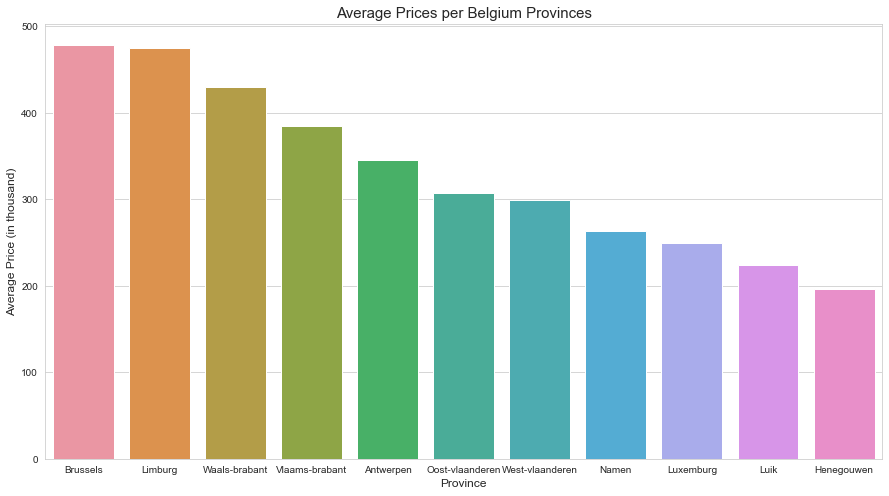

In [46]:
#Plotting the median property price for Belgium provinces
plt.figure(figsize=(15,8))
sns.set_style(style="whitegrid")
ax = sns.barplot(x='Province',y='Price',data=by_median)
ax.set_xlabel('Province', size=12)
ax.set_ylabel('Average Price (in thousand)', size=12)
ax.set_title('Average Prices per Belgium Provinces', size=15)

plt.show()

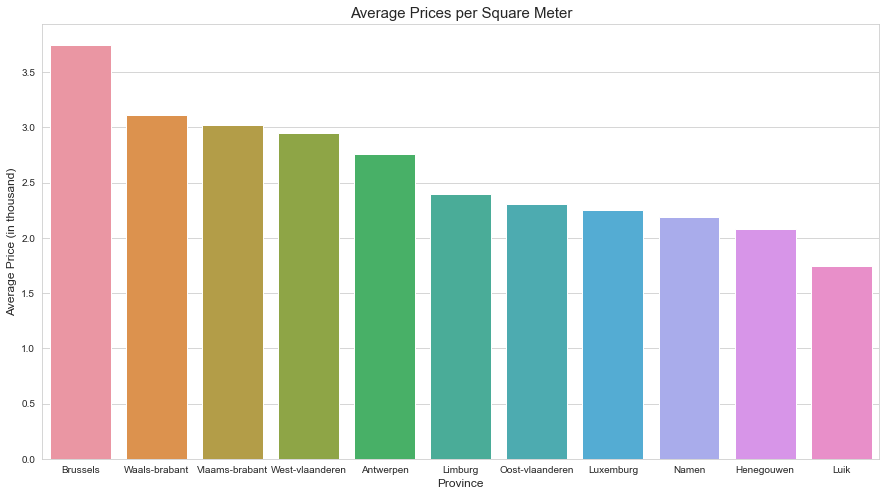

In [47]:
#Plotting the median property price per square meter for Belgium provinces

plt.figure(figsize=(15,8))
sns.set_style(style="whitegrid")
ax = sns.barplot(x='Province',y='Price per square meter',data=by_sqr_m)
ax.set_xlabel('Province', size=12)
ax.set_ylabel('Average Price (in thousand)', size=12)
ax.set_title('Average Prices per Square Meter', size=15)

plt.show()

#### As a final word, we see that Brussels has the highest price both for average and median calculation as well as the price per square meter for houses and apartments. Further analysis can be done on house and apartment seperately and  inspecting each province more in detail.